In [71]:
import cv2, os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#create lists to save the labels (the name of the shape)
labels = []
images = []
shape_dir = '/mnt/c/Users/DeWayne Halfen/Documents/Data Science/DataSets/four-shapes/'
shapes = ['square', 'circle', 'star', 'triangle']

#iterate through each shape
for shape in shapes:
    print('Getting data for: ', shape)
    #iterate through each file in the folder
    for path in os.listdir(shape_dir+shape):
        #add the image to the list of images
        images.append(cv2.imread(shape_dir+shape+'/'+path, 0))
        #add an integer to the labels list 
        labels.append(shapes.index(shape))

Getting data for:  square
Getting data for:  circle
Getting data for:  star
Getting data for:  triangle


In [72]:
image_array = np.array(images)
label_array = np.array(labels)
image_array.shape

(14970, 200, 200)

In [4]:
#break data into training and test sets
train_test_ratio, to_train = 5,0
train_images, test_images, train_labels, test_labels = [],[],[],[]
for image, label in zip(images, labels):
    if to_train < train_test_ratio:
        train_images.append(image)
        train_labels.append(label)
        to_train += 1
    else:
        test_images.append(image)
        test_labels.append(label)
        to_train = 0

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, label_array, test_size = 0.2, random_state=42)

In [74]:
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (11976, 200, 200) (11976,)
Testing data shape :  (2994, 200, 200) (2994,)


In [75]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  4
Output classes :  [0 1 2 3]


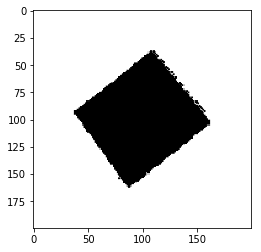

In [76]:
plt.imshow(X_train[0,:,:], cmap='gray')

In [77]:
X_train = X_train.reshape(-1, 200, 200, 1)
X_test = X_test.reshape(-1, 200, 200, 1)
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (11976, 200, 200, 1) (11976,)
Testing data shape :  (2994, 200, 200, 1) (2994,)


In [78]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

In [79]:
from keras.utils import to_categorical

# Change the labels from categorical to one-hot encoding
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Display the change for category label using one-hot encoding
print('Original label:', y_train[0])
print('After conversion to one-hot:', y_train_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0.]


In [80]:
X_train.shape,X_test.shape,y_train_one_hot.shape,y_test_one_hot.shape

((11976, 200, 200, 1), (2994, 200, 200, 1), (11976, 4), (2994, 4))

In [85]:
# Import necessary modules
import keras
import theano.ifelse
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [93]:
model = Sequential()
model.add(Conv2D(4, kernel_size=(5, 5), activation='linear', input_shape=(200,200,1), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
model.add(Dropout(0.25))
model.add(Conv2D(8, kernel_size=(5, 5), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(4, 4), padding='same'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(8, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

In [94]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 200, 200, 4)       104       
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 200, 200, 4)       0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 50, 50, 4)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 50, 50, 4)         0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 50, 50, 8)         808       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 50, 50, 8)         0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 13, 13, 8)         0         
__________

In [96]:
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

In [97]:
train = model.fit(X_train, y_train_one_hot, batch_size=64, epochs=20, verbose=1, 
                  validation_split=0.3, callbacks=[early_stopping_monitor])

Train on 8383 samples, validate on 3593 samples
Epoch 1/20
8383/8383 [==============================] - 115s 14ms/step - loss: 0.9937 - acc: 0.5423 - val_loss: 0.5030 - val_acc: 0.8500
Epoch 2/20
8383/8383 [==============================] - 99s 12ms/step - loss: 0.3794 - acc: 0.8512 - val_loss: 0.1041 - val_acc: 0.9917
Epoch 3/20
8383/8383 [==============================] - 114s 14ms/step - loss: 0.1996 - acc: 0.9289 - val_loss: 0.0490 - val_acc: 0.9939
Epoch 4/20
8383/8383 [==============================] - 100s 12ms/step - loss: 0.1458 - acc: 0.9507 - val_loss: 0.0319 - val_acc: 0.9961
Epoch 5/20
8383/8383 [==============================] - 114s 14ms/step - loss: 0.1082 - acc: 0.9685 - val_loss: 0.0257 - val_acc: 0.9964
Epoch 6/20
8383/8383 [==============================] - 118s 14ms/step - loss: 0.0977 - acc: 0.9721 - val_loss: 0.0178 - val_acc: 0.9975
Epoch 7/20
8383/8383 [==============================] - 113s 13ms/step - loss: 0.0807 - acc: 0.9776 - val_loss: 0.0162 - val_acc: 0

In [98]:
model.save("model.h5py")

In [99]:
test_eval = model.evaluate(X_test, y_test_one_hot, verbose=1)

2994/2994 [==============================] - 9s 3ms/step


In [100]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.001161137208919749
Test accuracy: 0.9996659986639946


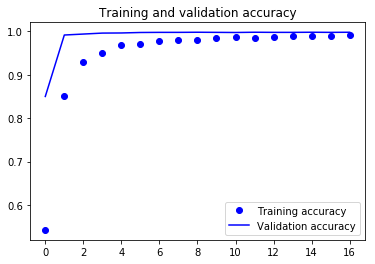

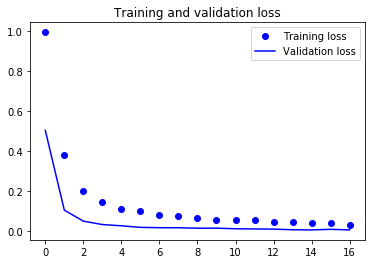

In [102]:
accuracy = train.history['acc']
val_accuracy = train.history['val_acc']
loss = train.history['loss']
val_loss = train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [104]:
predicted_classes = model.predict(X_test)

In [105]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [107]:
predicted_classes.shape, y_test.shape

((2994,), (2994,))

Found 2993 correct labels


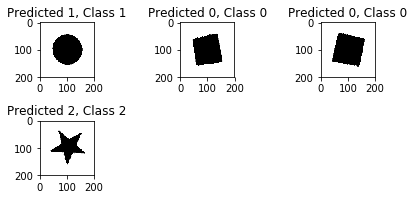

In [110]:
correct = np.where(predicted_classes==y_test)[0]
print('Found %d correct labels' % len(correct))
for i, correct in enumerate(correct[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(200,200), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Found 1 incorrect labels


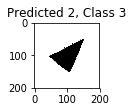

In [111]:
incorrect = np.where(predicted_classes!=y_test)[0]
print('Found %d incorrect labels' % len(incorrect))
for i, incorrect in enumerate(incorrect[:4]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(200,200), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [112]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(4)]
print(classification_report(y_test, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       1.00      1.00      1.00       765
    Class 1       1.00      1.00      1.00       723
    Class 2       1.00      1.00      1.00       770
    Class 3       1.00      1.00      1.00       736

avg / total       1.00      1.00      1.00      2994

